<a href="https://colab.research.google.com/github/ardakayaa/3d_Curtain_Model/blob/main/Curtain_Math_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
# Save datagenerators as file to colab working directory
# If you are using GitHub, make sure you get the "Raw" version of the code
url = 'https://raw.githubusercontent.com/reiniscimurs/Bezier-Curve/main/Bezier.py'
r = requests.get(url)

# make sure your filename is the same as how you want to import 
with open('Bezier.py', 'w') as f:
    f.write(r.text)

# now we can import
import Bezier 

In [ ]:
import random
import matplotlib.pyplot as plt
import math

class Point(object):
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def random(self, min= 0, max= 1):
        self.x = random.uniform(min,max)
        self.y = random.uniform(min,max)

class CubicBezier(object):
    def __init__(self, p0x= 0, p0y= 0, p1x= 0, p1y= 0, p2x= 0, p2y= 0, p3x= 0, p3y= 0):
        self.p0 = Point(p0x, p0y)
        self.p1 = Point(p1x, p1y)
        self.p2 = Point(p2x, p2y)
        self.p3 = Point(p3x, p3y)

    def calc_curve(self, granuality=100):
        'Calculate the cubic Bezier curve with the given granuality.'
        B_x = []
        B_y = []
        for t in range(0, granuality):
            t = t / granuality
            x = ((1 - t) ** 3) * self.p0.x + 3 * ((1 - t) ** 2) * t * self.p1.x + 3 * (1 - t) * (t ** 2) * self.p2.x\
                + (t ** 3) * self.p3.x
            y = ((1 - t) ** 3) * self.p0.y + 3 * ((1 - t) ** 2) * t * self.p1.y + 3 * (1 - t) * (t ** 2) * self.p2.y\
                + (t ** 3) * self.p3.y
            B_x.append(x)
            B_y.append(y)
        return [B_x, B_y]

    def plot(self, granuality=100):
        'Plot the cubic Bezier curve.'
        B = self.calc_curve(granuality)
        plt.plot(B[0], B[1])
        plt.scatter([self.p0.x,self.p1.x,self.p2.x,self.p3.x], [self.p0.y,self.p1.y,self.p2.y,self.p3.y])
        plt.axis('equal')
        plt.show()

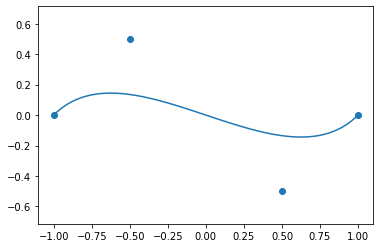

In [ ]:
curve = CubicBezier(p0x=-1, p0y=0, p1x=-0.5, p1y=0.5, p2x=0.5, p2y=-0.5, p3x=1, p3y=0)
curve.plot()

In [ ]:
!pip install bezier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 


In [ ]:
import bezier
import numpy as np

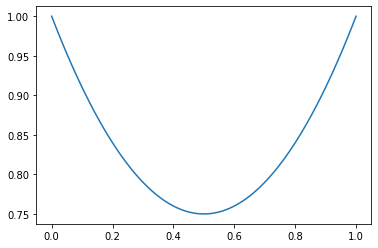

In [ ]:
nodes = np.asfortranarray([
    [0.0, 0.5, 1.0],
    [1.0, 0.5, 1.0]
])
curve = bezier.Curve(nodes, degree=2)
curve.plot(100)

In [90]:
def interpolation(p1x,p1y,p2x,p2y, x):
    output = p1y + (x - p1x) * ((p2y - p1y)/(p2x - p1x))
 
    return output
interpolation(0,1,1,2,0.0)

1.0

In [102]:
def calc_curve(p1x,p1y,p2x,p2y, granuality=100):
        'Calculate the cubic Bezier curve with the given granuality.'
        B_x = []
        B_y = []
        for t in range(0, granuality):
            t = t / granuality
            #print(t)
            x = interpolation(p1x,p1y,p2x,p2y,t)
            #print(x)
            B_x.append(x)
        return B_x

def plot(p1x,p1y,p2x,p2y,granuality=10):
        'Plot the cubic Bezier curve.'
        B = calc_curve(p1x,p1y,p2x,p2y,granuality)
        plt.plot(B)
        #plt.scatter([self.p0.x,self.p1.x,self.p2.x,self.p3.x], [self.p0.y,self.p1.y,self.p2.y,self.p3.y])
        plt.axis('equal')
        plt.show()


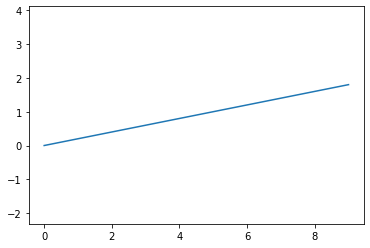

In [103]:
plot(0,0,1,2)